In [2]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [3]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Ionosphere\Ionosphere_AW_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,0,1.00000,-0.18829,NaN,-0.36156,NaN,-0.93597,NaN,NaN,...,NaN,-0.26569,NaN,NaN,NaN,-0.11593,NaN,-0.06288,-0.13738,NaN
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,0,1.00000,-0.45161,NaN,1.00000,NaN,NaN,NaN,NaN,...,NaN,0.90695,0.51613,1.00000,NaN,NaN,NaN,1.00000,NaN,NaN
4,1,0,NaN,-0.02401,NaN,0.06531,NaN,-0.23255,0.77152,-0.16399,...,NaN,-0.65158,0.13290,NaN,NaN,-0.62197,NaN,-0.59573,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1,0,0.94701,-0.00034,NaN,-0.03227,NaN,-0.03431,NaN,0.02446,...,NaN,0.03193,NaN,0.02542,NaN,0.02242,NaN,0.00442,NaN,NaN
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [4]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
int64		column 2	0
float64		column 3	17
float64		column 4	0
float64		column 5	69
float64		column 6	0
float64		column 7	69
float64		column 8	17
float64		column 9	52
float64		column 10	35
float64		column 11	52
float64		column 12	0
float64		column 13	52
float64		column 14	0
float64		column 15	51
float64		column 16	18
float64		column 17	69
float64		column 18	0
float64		column 19	69
float64		column 20	17
float64		column 21	69
float64		column 22	34
float64		column 23	69
float64		column 24	0
float64		column 25	69
float64		column 26	0
float64		column 27	35
float64		column 28	35
float64		column 29	69
float64		column 30	17
float64		column 31	69
float64		column 32	0
float64		column 33	51
float64		column 34	69


In [5]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,351.000000,351.0,334.000000,351.000000,282.000000,351.000000,282.000000,334.000000,299.000000,316.000000,...,282.000000,351.000000,316.000000,316.000000,282.000000,334.000000,282.000000,351.000000,300.000000,282.000000
mean,0.891738,0.0,0.642608,0.044372,0.585158,0.115889,0.537268,0.126982,0.497831,0.178757,...,0.403809,-0.071187,0.563058,-0.069118,0.410249,-0.026647,0.362497,-0.003794,0.352224,0.002107
std,0.311155,0.0,0.489066,0.441435,0.527907,0.460810,0.494879,0.517158,0.512555,0.488263,...,0.571368,0.508495,0.494108,0.538427,0.569985,0.504333,0.580842,0.513574,0.528426,0.451269
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.471517,-0.064735,0.392632,-0.024795,0.199265,-0.044347,0.065610,-0.045515,...,0.000000,-0.332390,0.334985,-0.404138,0.009223,-0.228628,0.000000,-0.242595,0.000000,-0.161013
50%,1.000000,0.0,0.870400,0.016310,0.793910,0.022800,0.713455,0.015595,0.667250,0.015985,...,0.560525,-0.015050,0.712920,-0.016600,0.535500,0.000000,0.470280,0.000000,0.419095,0.000000
75%,1.000000,0.0,1.000000,0.194185,0.997628,0.334655,0.963093,0.483255,0.928895,0.532197,...,0.898778,0.156765,0.999918,0.147285,0.903390,0.151715,0.871603,0.200120,0.821487,0.143867
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

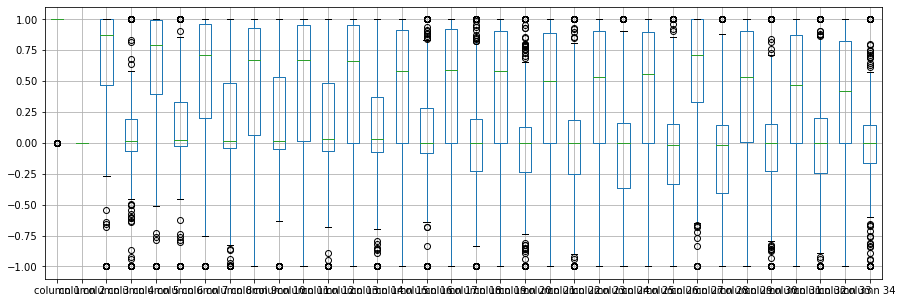

In [6]:
df.boxplot(return_type='axes', figsize=(15,5))

In [7]:
df.mean()

column 1     0.891738
column 2     0.000000
column 3     0.642608
column 4     0.044372
column 5     0.585158
column 6     0.115889
column 7     0.537268
column 8     0.126982
column 9     0.497831
column 10    0.178757
column 11    0.482418
column 12    0.155040
column 13    0.388752
column 14    0.093414
column 15    0.320193
column 16    0.070374
column 17    0.368425
column 18   -0.003617
column 19    0.360668
column 20   -0.029174
column 21    0.325850
column 22    0.000884
column 23    0.357184
column 24   -0.057406
column 25    0.403809
column 26   -0.071187
column 27    0.563058
column 28   -0.069118
column 29    0.410249
column 30   -0.026647
column 31    0.362497
column 32   -0.003794
column 33    0.352224
column 34    0.002107
dtype: float64

In [8]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,NaN,0.288653,-0.006529,0.153599,0.127606,0.175678,0.029380,0.209958,-0.082169,...,0.050050,0.149789,-0.183333,0.010895,0.093999,-0.165180,0.180612,-0.100914,0.153949,0.026810
column 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
column 3,0.288653,NaN,1.000000,0.113425,0.461006,0.025861,0.423595,0.033818,0.455570,0.021285,...,0.305580,-0.116228,0.122223,0.087944,0.293085,0.028086,0.255373,0.001186,0.242920,0.027147
column 4,-0.006529,NaN,0.113425,1.000000,-0.067713,-0.190308,-0.122146,0.247646,-0.329388,0.170056,...,-0.113993,-0.236987,-0.094454,-0.062139,-0.070679,0.330483,-0.162876,-0.122788,-0.194013,0.060890
column 5,0.153599,NaN,0.461006,-0.067713,1.000000,-0.006881,0.626352,0.009566,0.448794,-0.044377,...,0.258901,-0.084258,0.109751,0.177430,0.275774,0.022659,0.461108,0.036469,0.402536,-0.109094
column 6,0.127606,NaN,0.025861,-0.190308,-0.006881,1.000000,-0.013873,0.305961,-0.104748,0.221094,...,-0.211900,0.041787,-0.188981,-0.096134,-0.049485,-0.164050,-0.098621,0.316802,0.024775,0.199493
column 7,0.175678,NaN,0.423595,-0.122146,0.626352,-0.013873,1.000000,-0.156105,0.487697,-0.119534,...,0.319893,0.033191,0.059065,0.066859,0.268461,-0.062301,0.419291,-0.058088,0.597934,-0.122699
column 8,0.029380,NaN,0.033818,0.247646,0.009566,0.305961,-0.156105,1.000000,-0.344894,0.391218,...,-0.174153,-0.148826,-0.269692,0.067110,-0.130644,0.060612,-0.159490,0.155960,-0.182927,0.378001
column 9,0.209958,NaN,0.455570,-0.329388,0.448794,-0.104748,0.487697,-0.344894,1.000000,-0.305717,...,0.352921,0.150491,0.201358,0.111009,0.338362,-0.029547,0.329898,-0.068493,0.360486,-0.084709
column 10,-0.082169,NaN,0.021285,0.170056,-0.044377,0.221094,-0.119534,0.391218,-0.305717,1.000000,...,-0.267199,-0.055148,-0.263646,0.073036,-0.155754,-0.050129,-0.141084,-0.022251,-0.193110,0.122692


In [9]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [10]:
imputer = md.Midas(layer_structure = [34,34+52,34+52+52,34+52+52+52,34+52+52+52+52,34+52+52+52,34+52+52,34+52,34], vae_layer = False, seed = 520)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 18.236722628275555
Epoch: 1 , loss: 17.965280759902228
Epoch: 2 , loss: 18.101528440202987
Epoch: 3 , loss: 18.019041742597306
Epoch: 4 , loss: 17.902937253316242
Epoch: 5 , loss: 17.86556257520403
Epoch: 6 , loss: 17.745558375403995
Epoch: 7 , loss: 17.610738799685524
Epoch: 8 , loss: 17.507856913975306
Epoch: 9 , loss: 16.92101542154948
Epoch: 10 , loss: 16.15303289322626
Epoch: 11 , loss: 16.140638487679617
Epoch: 12 , loss: 15.998079663231259
Epoch: 13 , loss: 15.904957180931454
Epoch: 14 , loss: 15.860019910903205
Epoch: 15 , loss: 15.891617774963379
Epoch: 16 , loss: 15.774350438799177
Epoch: 17 , loss: 15.770328703380766
Epoch: 18 , loss: 15.64304256439209
Epoch: 19 , loss: 15.620252654665993
Epoch: 20 , loss: 15.670452027093797
Epoch: 21 , loss: 15.642826171148391
Epoch: 22 , loss: 15.619971320742653
Epoch: 23 , loss: 15.732967195056734
Epoch: 24 , loss: 15.496653420584542
Epoch: 25 , loss: 15.

In [11]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(351, 34)

In [12]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.0
column 2     0.0
column 3     1.0
column 4     1.0
column 5     0.0
column 6     0.0
column 7     0.0
column 8     0.0
column 9    -1.0
column 10   -1.0
column 11    0.0
column 12    0.0
column 13    0.0
column 14    0.0
column 15   -1.0
column 16   -1.0
column 17   -1.0
column 18   -1.0
column 19   -1.0
column 20    1.0
column 21   -1.0
column 22    1.0
column 23    0.0
column 24    0.0
column 25    0.0
column 26    0.0
column 27    1.0
column 28   -1.0
column 29   -1.0
column 30    1.0
column 31   -1.0
column 32    1.0
column 33   -1.0
column 34    1.0
Name: 21, dtype: float64

In [13]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Ionosphere.xlsx', header=None,names=column_names)

In [14]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0,0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,0,0,0.000000,0.0,-0.735761,0.0,0.301026,0.000000,-0.807359,0.061224,...,0.362567,0.0,0.396736,0.170955,0.347225,0.000000,0.312207,0.0,0.000000,0.021717
2,0,0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
3,0,0,0.000000,0.0,-0.736773,0.0,-0.451429,0.999726,0.271612,0.011272,...,-0.779532,0.0,0.000000,0.000000,-0.787474,0.201298,-0.068772,0.0,0.512140,-0.994456
4,0,0,-0.781932,0.0,-0.735771,0.0,-0.716434,0.000000,0.000000,0.000000,...,0.140183,0.0,0.000000,0.523859,0.144746,0.000000,0.210506,0.0,0.201935,0.659207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0,0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
347,0,0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
348,0,0,0.000000,0.0,-0.560693,0.0,-0.582829,0.000000,-0.566768,0.000000,...,-0.619296,0.0,-0.546477,0.000000,-0.611027,0.000000,-0.653151,0.0,-0.655416,0.020727
349,0,0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


Calculating NRMSE Value

In [15]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [16]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [17]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

18.783425051030786

In [18]:
denominator=Frobenius_norm(complete_df)
denominator

68.46016929900117

In [19]:
NRMS=numerator/denominator
NRMS


0.27437012270585837

In [20]:
new_df.iloc[66,:]

column 1     1.000000
column 2     0.000000
column 3     0.318436
column 4     0.280460
column 5     0.300097
column 6     0.024770
column 7     0.298588
column 8     0.077640
column 9     1.000000
column 10    0.043170
column 11    0.321649
column 12    0.332660
column 13    0.298039
column 14    0.054890
column 15    0.282053
column 16    0.043840
column 17    0.295958
column 18   -0.245980
column 19    0.284515
column 20   -0.086680
column 21    0.263606
column 22    0.044779
column 23    0.266279
column 24    0.273760
column 25    0.258387
column 26   -0.390560
column 27    0.964140
column 28   -0.002882
column 29    0.246119
column 30    0.233600
column 31    0.225099
column 32   -0.220210
column 33    0.221611
column 34   -0.000463
Name: 66, dtype: float64

In [21]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,0,0.995390,-0.05889,0.852430,0.02306,0.833980,-0.377080,1.000000,0.037600,...,0.568110,-0.51171,0.410780,-0.461680,0.212660,-0.340900,0.422670,-0.54487,0.186410,-0.453000
1,1,0,1.000000,-0.18829,0.194589,-0.36156,0.192346,-0.935970,0.192641,0.015734,...,0.159247,-0.26569,0.192056,-0.013055,0.156825,-0.115930,0.145947,-0.06288,-0.137380,-0.002753
2,1,0,1.000000,-0.03365,1.000000,0.00485,1.000000,-0.120620,0.889650,0.011980,...,0.575280,-0.40220,0.589840,-0.221450,0.431000,-0.173650,0.604360,-0.24180,0.560450,-0.382380
3,1,0,1.000000,-0.45161,0.263227,1.00000,0.260731,-0.000274,0.271612,0.011272,...,0.220468,0.90695,0.516130,1.000000,0.212526,0.000308,0.188048,1.00000,0.188320,0.005544
4,1,0,0.218068,-0.02401,0.205629,0.06531,0.204626,-0.232550,0.771520,-0.163990,...,0.173043,-0.65158,0.132900,-0.008201,0.169056,-0.621970,0.153436,-0.59573,0.155855,0.002237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.835080,0.08298,0.737390,-0.14706,0.843490,-0.055670,0.904410,-0.046220,...,0.953780,-0.04202,0.834790,0.001230,1.000000,0.128150,0.866600,-0.10714,0.905460,-0.043070
347,1,0,0.951130,0.00419,0.951830,-0.02723,0.934380,-0.019200,0.945900,0.016060,...,0.945200,0.01361,0.935220,0.049250,0.931590,0.081680,0.940660,-0.00035,0.914830,0.047120
348,1,0,0.947010,-0.00034,0.371377,-0.03227,0.368941,-0.034310,0.389072,0.024460,...,0.320584,0.03193,0.378413,0.025420,0.310173,0.022420,0.271439,0.00442,0.271554,0.014957
349,1,0,0.906080,-0.01657,0.981220,-0.01989,0.956910,-0.036460,0.857460,0.001100,...,0.910500,-0.02099,0.891470,-0.077600,0.829830,-0.172380,0.960220,-0.03757,0.874030,-0.162430


In [22]:
imputations[-1].to_excel("Ionosphere_AW_10(imp).xlsx", index=False, header=False)